In [ ]:
import numpy as np
import os 
import cv2 


In [ ]:
xz=0				   #Переменная нужна для создания уникальных файлов. 
def sim_xyz(c, x, img):
    global xz
    hieght, width = img.shape[:2]

    for i in range(100):
        xz += 1
        # Отражение по оси XYZ
        M = np.float32([[1, c, 0], [x, 1, 0], [0, 0, 1]])
        res = cv2.warpPerspective(img, M, (width, hieght))
        cv2.imwrite(r'train/'+str(xz)+'_sim.png', res)
        xz += 1

        # Зеркальное отражение
        flip_img = cv2.flip(res, 1)
        cv2.imwrite(r'train/'+str(xz)+'_sim.png', flip_img)
        xz += 1

        # Отображение по углам от -180 до 180 оси XY
        center = (width/2, hieght/2)
        for i in range(0, 45, 10):
            xz += 1
            m = cv2.getRotationMatrix2D(center, i, 1.0)
            rotated = cv2.warpAffine(res, m, (width, hieght))
            flip_img_rot = cv2.flip(rotated, 1)
            cv2.imwrite(r'train/'+str(xz)+'_sim.png', rotated)
            xz += 1
            cv2.imwrite(r'train/'+str(xz)+'_sim.png', flip_img_rot)

        if c != 0:
            c += 0.06
        if x != 0:
            x += 0.06
        if c > 0.5 or x > 0.5:
            break


directory = os.listdir(r'train/')
image = cv2.imread(r'de-1202.jpg')
sim_xyz(c=0.02, x=0, img=image)
sim_xyz(c=0, x=0.02, img=image)
sim_xyz(c=0.02, x=0.02, img=image)


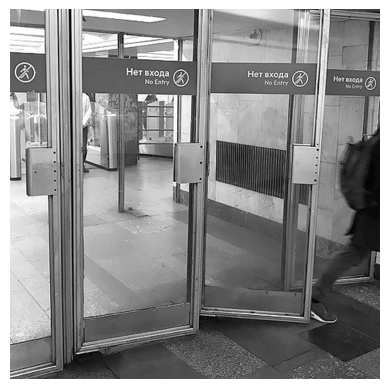

In [ ]:
xz = 0
data_exit = os.listdir('data/') 	    		  #Папка с файлами, которые ищем.

src = cv2.imread(r'data/de-1200.jpg')         #Читаем файл

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)	             #Переводим изображение в оттенки  серого. 
gray = cv2.imread(r'data/de-1200.jpg', cv2.IMREAD_GRAYSCALE) 
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

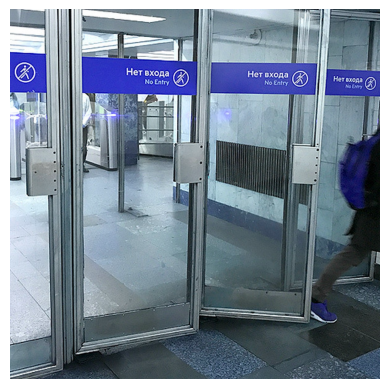

In [ ]:
data_exit = os.listdir('train2/')
gray = cv2.imread(r'data/mers.jpg', cv2.IMREAD_GRAYSCALE) 
	

i = 0					     #переменная счетчик для количества проходов.
for exit in data_exit:	             #Цикл начинает брать все файлы из папки, которые ищем.  
    a = [[[[]]]] 						             #Переменная для проверки.                
    gray_1 = cv2.imread(r'train2/'+exit, cv2.IMREAD_GRAYSCALE)	  	           #Читаем файл.  

    try: 								             #Обработка ошибок. 
        src.shape
    except AttributeError:
        continue            
    
    w,h = gray_1.shape[::-1]					       #Записываем размер изображения. 
    res = cv2.matchTemplate(gray, gray_1, cv2.TM_CCOEFF_NORMED)  #Сопоставляем шаблоны. 
    threshould = 0.50 						          #Пороговое значение.
    loc = np.where(res>=threshould)#Сохраняем в переменную значения, больше
    for pt in zip(*loc[::-1]): 					          #Выбираем каждое значение. 
        cv2.rectangle(src, pt, (pt[0]+w, pt[1]+h), (0,0,255), 2)		         #Рисуем рамку.
   
    xz+=1

    plt.imshow(src)
    plt.axis('off')
    plt.show()

    sk_marked = r'train2/'#Ссылка на изображение.
    cv2.imwrite(r'train2/'+str(xz)+'_marked.png', src)#Сохраняем изображение.
    break
plt.imshow(src)
plt.axis('off')
plt.show()

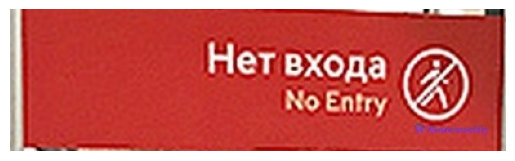

In [ ]:
template = cv2.imread('de-1202.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template, cmap='gray')
plt.axis('off')
plt.show()

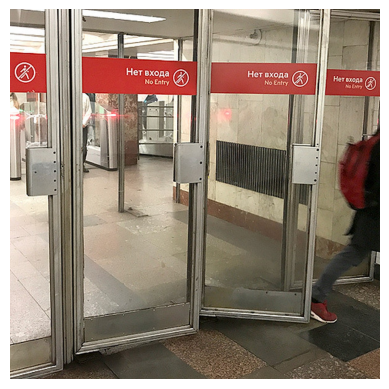

In [ ]:
image = cv2.imread('data/de-1200.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def find_matches(image, template, threshold=0.6):
    # Загрузка изображения и шаблона
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    # Получение ширины и высоты шаблона
    w, h = template_gray.shape[::-1]

    # Применение метода совпадения шаблонов
    res = cv2.matchTemplate(gray, template_gray, cv2.TM_CCOEFF_NORMED)
    
    
    # Получение координат, где совпадение превышает пороговое значение
    loc = np.where(res >= threshold)
    print(loc)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

    # Отображение результата в Jupyter Notebook
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()
    return loc

In [ ]:
data_exist = os.listdir('train/') 	    		  #Папка с файлами, которые ищем.

src = cv2.imread('data/de-1200.jpg')         #Читаем файл
template_3 = cv2.imread('train/3_sim.png')
template_2 = cv2.imread('train/2_sim.png')
template_1 = cv2.imread('train/1_sim.png')

for file in data_exist:
    template = cv2.imread(r'train/'+file)
    print(file)
    if find_matches(src, template)!=[]:
        plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()